In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import string
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [107]:
df = pd.read_csv('/Users/pritamdas/python/ai_generated_text/labelled_train_set.csv')
df1 = pd.read_csv('/Users/pritamdas/python/ai_generated_text/unlabelled_test2.csv')
df.head()

,ID,Article,Type
0,TRAIN_1,There are a variety of emerging applications f...,Human-written
1,TRAIN_2,As each new means of communication and social ...,Human-written
2,TRAIN_3,"These suggestions include:, Learn about the pu...",Human-written
3,TRAIN_4,In recent years there has been growing concern...,Human-written
4,TRAIN_5,"By the late 1970s, researchers at many major u...",Human-written


In [108]:
df1.head()

,ID,Article
0,TEST_1,Grid computing is a type of distributed comput...
1,TEST_2,"RAID stands for ""Redundant Array of Independen..."
2,TEST_3,A computer password is a sequence of character...
3,TEST_4,For people who find commercial online services...
4,TEST_5,A Green PC is a computer that has been designe...


In [109]:
df.info(), df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       497 non-null    object
 1   Article  497 non-null    object
 2   Type     497 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       517 non-null    object
 1   Article  517 non-null    object
dtypes: object(2)
memory usage: 8.2+ KB


(None, None)

In [110]:
def get_type(Type):
    if Type == 'Human-written':
        return 0
    else:
        return 1

df['Type'] = df['Type'].apply(get_type)

In [111]:
def check_duplicates_null_values(df: pd.DataFrame):
    null_values = df.isnull().sum()
    duplicate_values = df.duplicated().sum()
    return null_values, duplicate_values
    
df.apply(check_duplicates_null_values)

,ID,Article,Type
0,0,0,0
1,0,1,495


In [112]:
df1.apply(check_duplicates_null_values)

,ID,Article
0,0,0
1,0,2


In [113]:
df['Article'] = df['Article'].drop_duplicates(keep = 'first')
df = df.dropna()
df.apply(check_duplicates_null_values)

,ID,Article,Type
0,0,0,0
1,0,0,494


In [114]:
df1['Article'] = df1['Article'].drop_duplicates(keep='first')
df1 = df1.dropna()
df1.apply(check_duplicates_null_values)

,ID,Article
0,0,0
1,0,0


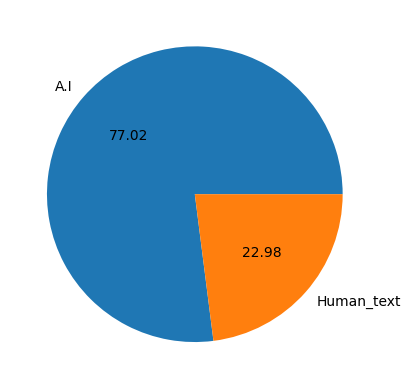

In [115]:
plt.pie(df['Type'].value_counts(), labels = ['A.I','Human_text'], autopct='%0.2f')
plt.show()

In [116]:
def remove_text(text):
    cleanned_text = re.sub(r'[a-zA-Z_]', '', text)
    return cleanned_text

df['ID'] = df['ID'].apply(remove_text)
df1['ID'] = df1['ID'].apply(remove_text)

In [117]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" 
                           u"\U0001F300-\U0001F5FF" 
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [118]:
def remove_url(text): 
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)

In [119]:
def clean_text(text): 
    delete_dict = {character: '' for character in string.punctuation} 
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr = text1.split()
    text2 = (' '.join([w for w in textArr if not w.isdigit()])).lower() 
    return re.sub(r'[^A-Za-z\s]+', '', text2)   

In [120]:
df['Article'] = df['Article'].apply(remove_emoji)
df['Article'] = df['Article'].apply(remove_url)

In [121]:
df1['Article'] = df1['Article'].apply(remove_emoji)
df1['Article'] = df1['Article'].apply(remove_url)
df1['Article'] = df1['Article'].apply(clean_text)

In [122]:
df['num_of_char'] = df['Article'].apply(len)

In [123]:
df1['num_of_char'] = df1['Article'].apply(len)

In [124]:
def wordtokenizer(df: pd.DataFrame, column_name: str):
    return df[column_name].apply(lambda x: len(nltk.word_tokenize(x)))

In [125]:
df['no_of_words'] = wordtokenizer(df, 'Article')
df

,ID,Article,Type,num_of_char,no_of_words
0,1,There are a variety of emerging applications f...,0,630,100
1,2,As each new means of communication and social ...,0,1146,196
2,3,"These suggestions include:, Learn about the pu...",0,1032,197
3,4,In recent years there has been growing concern...,0,697,120
4,5,"By the late 1970s, researchers at many major u...",0,1317,236
...,...,...,...,...,...
492,496,Handwriting recognition technology has numerou...,1,1508,241
493,497,Digital Rights Management (DRM) (sometimes als...,0,861,149
494,498,A cookie is a small piece of data that is stor...,1,1050,197
495,499,The hexadecimal system is a number system with...,1,1325,276


In [126]:
df1['no_of_words'] = wordtokenizer(df1, 'Article')
df1

,ID,Article,num_of_char,no_of_words
0,1,grid computing is a type of distributed comput...,337,52
1,2,raid stands for redundant array of independent...,1233,195
2,3,a computer password is a sequence of character...,359,57
3,4,for people who find commercial online services...,1152,198
4,5,a green pc is a computer that has been designe...,244,40
...,...,...,...,...
512,513,a computer security incident response team csi...,338,45
513,514,recordable cds also known as cdrs are a type o...,620,119
514,515,a webmaster is a person responsible for managi...,730,105
515,516,the standard for serial transmission is a set ...,1445,223


In [127]:
def sentokenizer(df: pd.DataFrame, column_name: str):
    return df[column_name].apply(lambda x: len(nltk.sent_tokenize(x)))

In [128]:
df['no_of_sentence'] = sentokenizer(df, 'Article')
df

,ID,Article,Type,num_of_char,no_of_words,no_of_sentence
0,1,There are a variety of emerging applications f...,0,630,100,2
1,2,As each new means of communication and social ...,0,1146,196,8
2,3,"These suggestions include:, Learn about the pu...",0,1032,197,10
3,4,In recent years there has been growing concern...,0,697,120,3
4,5,"By the late 1970s, researchers at many major u...",0,1317,236,10
...,...,...,...,...,...,...
492,496,Handwriting recognition technology has numerou...,1,1508,241,9
493,497,Digital Rights Management (DRM) (sometimes als...,0,861,149,6
494,498,A cookie is a small piece of data that is stor...,1,1050,197,7
495,499,The hexadecimal system is a number system with...,1,1325,276,8


In [129]:
df1['no_of_sentence'] = sentokenizer(df1, 'Article')
df1

,ID,Article,num_of_char,no_of_words,no_of_sentence
0,1,grid computing is a type of distributed comput...,337,52,1
1,2,raid stands for redundant array of independent...,1233,195,1
2,3,a computer password is a sequence of character...,359,57,1
3,4,for people who find commercial online services...,1152,198,1
4,5,a green pc is a computer that has been designe...,244,40,1
...,...,...,...,...,...
512,513,a computer security incident response team csi...,338,45,1
513,514,recordable cds also known as cdrs are a type o...,620,119,1
514,515,a webmaster is a person responsible for managi...,730,105,1
515,516,the standard for serial transmission is a set ...,1445,223,1


In [130]:
df[['num_of_char','no_of_words', 'no_of_sentence']].describe()

,num_of_char,no_of_words,no_of_sentence
count,496.000000,496.000000,496.000000
mean,954.247984,169.407258,7.054435
std,439.136900,77.758753,3.797801
min,151.000000,28.000000,1.000000
25%,612.500000,110.000000,4.000000
50%,898.000000,158.500000,7.000000
75%,1222.500000,216.250000,9.000000
max,2963.000000,520.000000,32.000000


In [131]:
df1[['num_of_char','no_of_words', 'no_of_sentence']].describe()

,num_of_char,no_of_words,no_of_sentence
count,515.000000,515.000000,515.0
mean,1049.914563,165.036893,1.0
std,444.894637,68.419544,0.0
min,199.000000,30.000000,1.0
25%,730.500000,116.500000,1.0
50%,1045.000000,167.000000,1.0
75%,1351.000000,212.000000,1.0
max,2482.000000,385.000000,1.0


In [132]:
df[df['Type'] == 1][['num_of_char','no_of_words', 'no_of_sentence']].describe()

,num_of_char,no_of_words,no_of_sentence
count,114.000000,114.000000,114.000000
mean,1190.736842,210.473684,8.622807
std,517.084150,90.783630,4.346477
min,238.000000,38.000000,1.000000
25%,879.000000,152.500000,6.000000
50%,1199.000000,209.500000,8.000000
75%,1491.250000,263.750000,11.000000
max,2963.000000,520.000000,32.000000


In [133]:
df[df['Type'] == 0][['num_of_char','no_of_words', 'no_of_sentence']].describe()

,num_of_char,no_of_words,no_of_sentence
count,382.000000,382.000000,382.000000
mean,883.672775,157.151832,6.586387
std,386.669432,68.963857,3.490012
min,151.000000,28.000000,1.000000
25%,583.250000,104.000000,4.000000
50%,846.000000,148.500000,6.000000
75%,1129.750000,200.750000,9.000000
max,2183.000000,373.000000,25.000000


In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_of_char', ylabel='Count'>

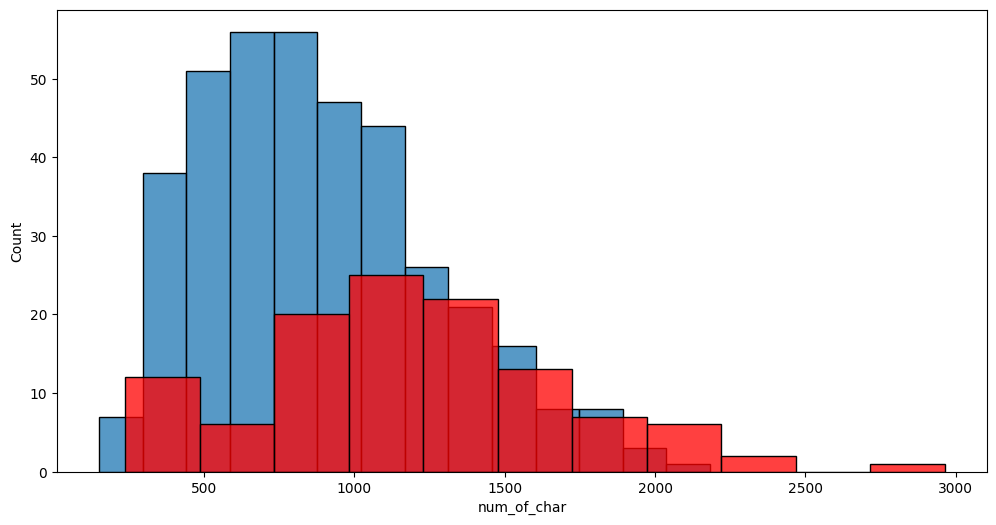

In [135]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Type'] == 0]['num_of_char'])
sns.histplot(df[df['Type'] == 1]['num_of_char'],color='red')

<Axes: xlabel='no_of_words', ylabel='Count'>

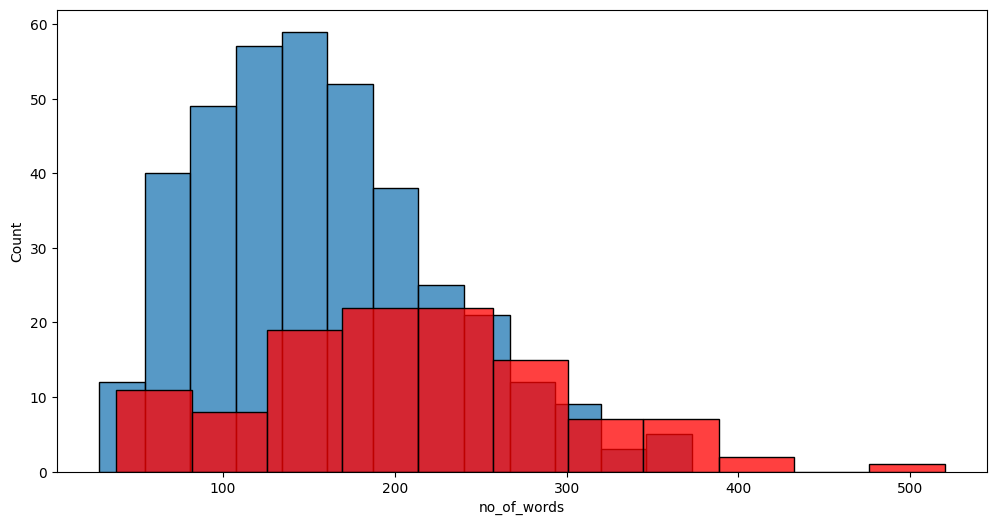

In [136]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Type'] == 0]['no_of_words'])
sns.histplot(df[df['Type'] == 1]['no_of_words'],color='red')

<Axes: xlabel='no_of_sentence', ylabel='Count'>

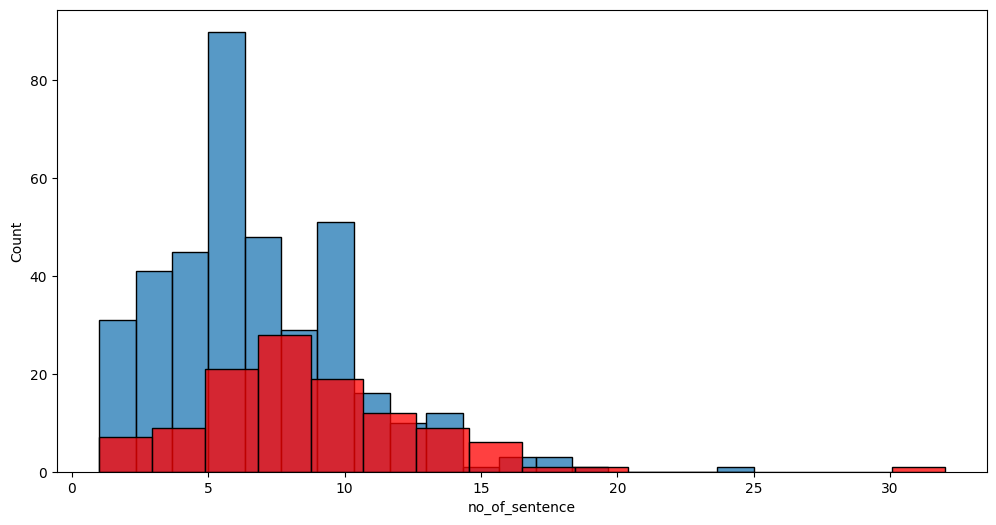

In [137]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Type'] == 0]['no_of_sentence'])
sns.histplot(df[df['Type'] == 1]['no_of_sentence'],color='red')

<Figure size 1200x1000 with 0 Axes>

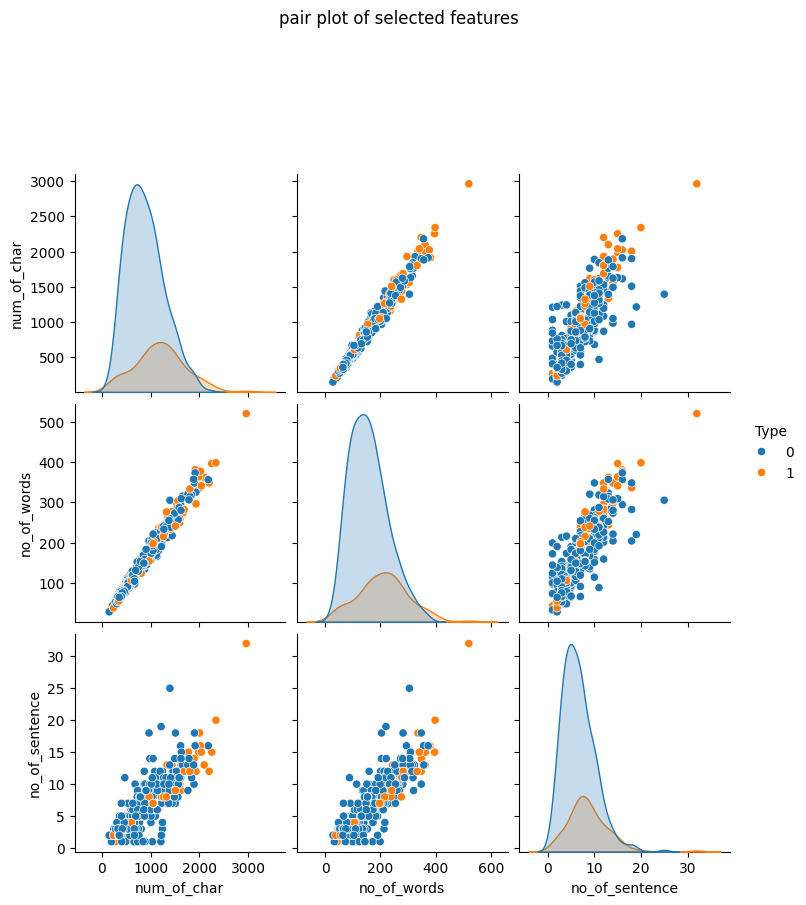

In [138]:
plt.figure(figsize=(12,10))
sns.pairplot(df, hue = 'Type')
plt.suptitle("pair plot of selected features", y = 1.20)
plt.show()

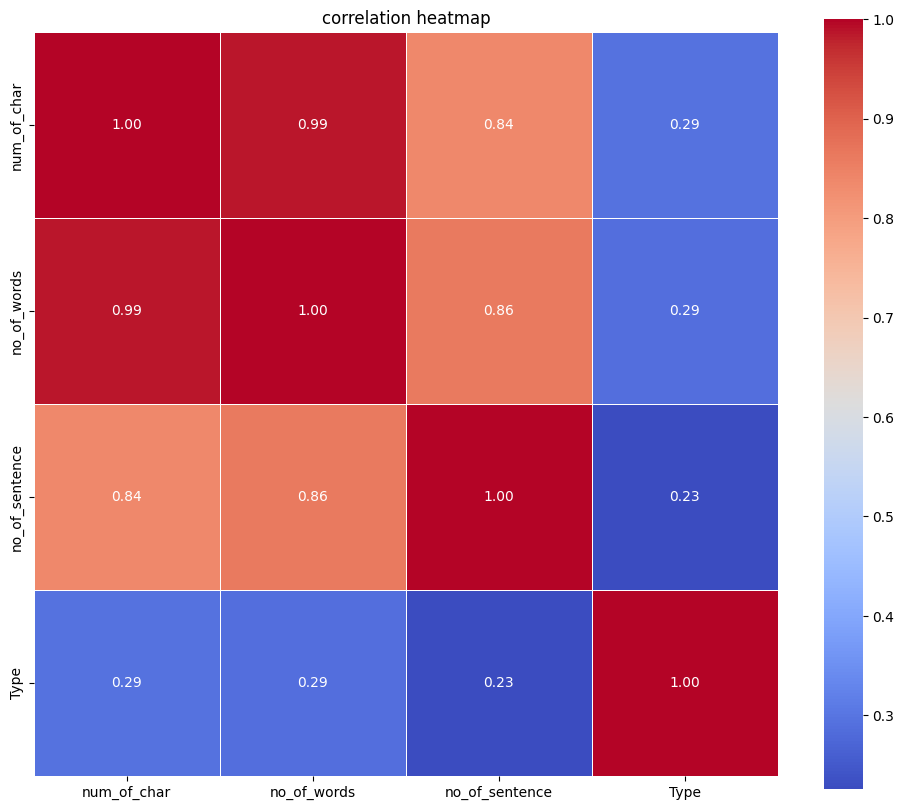

In [139]:
plt.figure(figsize=(12,10))
sns.heatmap(df[['num_of_char','no_of_words', 'no_of_sentence', 'Type']].corr(), annot=True, fmt = ".2f", cmap = "coolwarm", linewidths=0.5, square = True)
plt.title("correlation heatmap")
plt.show()

In [140]:
df['Article'] = df['Article'].apply(clean_text)

In [141]:
def remove_stopwrds(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words) 

In [142]:
df['Article'] = df['Article'].apply(remove_stopwrds)
df1['Article'] = df1['Article'].apply(remove_stopwrds)

In [143]:
def word_to_tokenizer(df: pd.DataFrame, column_name: str):
    return df[column_name].apply(lambda x: nltk.word_tokenize(x))

df['Article'] = word_to_tokenizer(df, 'Article')
df1['Article'] = word_to_tokenizer(df1, 'Article')

In [144]:
stemmer = PorterStemmer()
def apply_stemming(text):
    stemmed_tokens = [stemmer.stem(text) for text in text]
    stemmed_text = ' '.join(stemmed_tokens)
    return stemmed_text

In [145]:
df['stemmed_Article'] = df['Article'].apply(apply_stemming)
df1['stemmed_Article'] = df1['Article'].apply(apply_stemming)

In [146]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

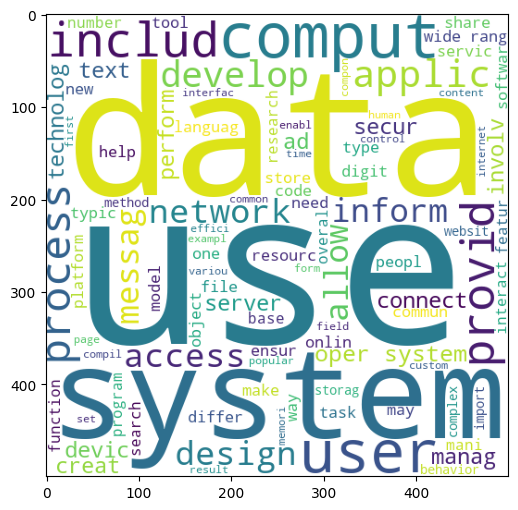

In [147]:
AI_generated_wc = wc.generate(df[df['Type'] == 1]['stemmed_Article'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(AI_generated_wc)

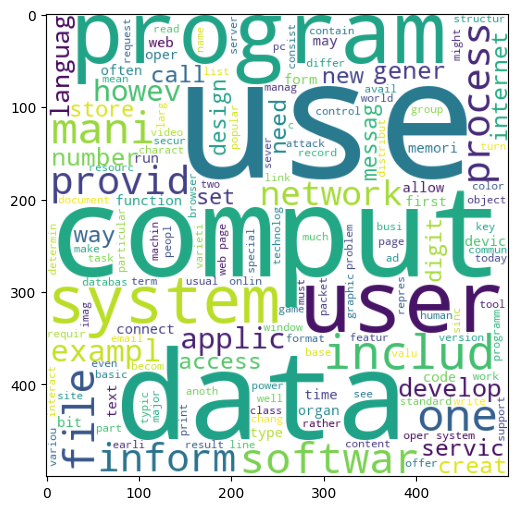

In [148]:
Human_written_wc = wc.generate(df[df['Type'] == 0]['stemmed_Article'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(Human_written_wc)

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


knn = KNeighborsClassifier()
xgb = XGBClassifier(n_estimators=100,random_state=2)

tf = TfidfVectorizer(max_features=4000)

In [150]:
tf_X = tf.fit_transform(df['stemmed_Article']).toarray()
tf_X1 = tf.fit_transform(df1['stemmed_Article']).toarray()

In [151]:
y = df['Type'].values

In [152]:
X_train, X_test, y_train, y_test = train_test_split(tf_X, y, test_size=0.2, random_state = 42)

In [153]:
from sklearn.preprocessing import StandardScaler
X_train = np.array([np.array(vec) for vec in X_train])
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [154]:
X_test = np.array([np.array(vec) for vec in X_test])
X_test = scaler.fit_transform(X_test)

In [155]:
def show_results(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)

    if len(set(y)) == 2:
        y_proba = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
        print("ROC-AUC:", roc_auc)

        RocCurveDisplay.from_estimator(best_model, X_test, y_test)
        plt.show()

Confusion Matrix:
 [[79  1]
 [19  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89        80
           1       0.50      0.05      0.09        20

    accuracy                           0.80       100
   macro avg       0.65      0.52      0.49       100
weighted avg       0.74      0.80      0.73       100

Accuracy: 0.8
ROC-AUC: 0.51875


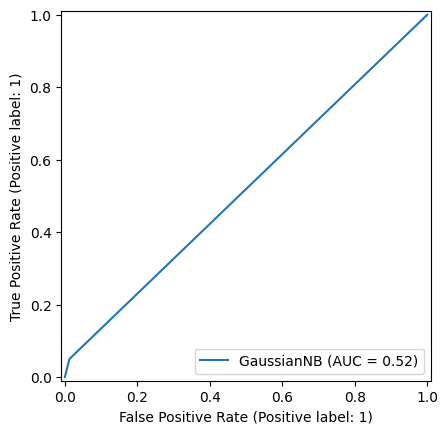

In [156]:
gnb = GaussianNB()

param_grid = {'var_smoothing': [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7]}

show_results(gnb, param_grid)

/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklea

Confusion Matrix:
 [[72  8]
 [ 8 12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        80
           1       0.60      0.60      0.60        20

    accuracy                           0.84       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.84      0.84      0.84       100

Accuracy: 0.84
ROC-AUC: 0.81875


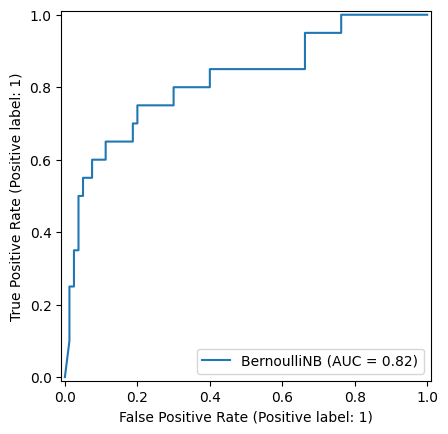

In [157]:
bnb = BernoulliNB()

bnb_param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False]
}

show_results(bnb, bnb_param_grid)

/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklea

Confusion Matrix:
 [[79  1]
 [17  3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90        80
           1       0.75      0.15      0.25        20

    accuracy                           0.82       100
   macro avg       0.79      0.57      0.57       100
weighted avg       0.81      0.82      0.77       100

Accuracy: 0.82
ROC-AUC: 0.844375


/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklea

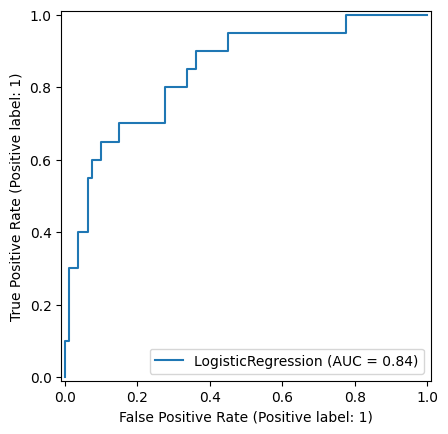

In [158]:
lr = LogisticRegression(max_iter= 1000,random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga'] 
}

show_results(lr, param_grid)

Confusion Matrix:
 [[77  3]
 [13  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        80
           1       0.70      0.35      0.47        20

    accuracy                           0.84       100
   macro avg       0.78      0.66      0.69       100
weighted avg       0.82      0.84      0.82       100

Accuracy: 0.84
ROC-AUC: 0.8512500000000001


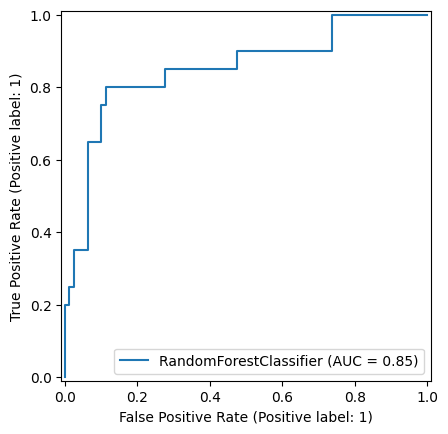

In [159]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

show_results(rf, param_grid)

Confusion Matrix:
 [[80  0]
 [20  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        80
           1       0.00      0.00      0.00        20

    accuracy                           0.80       100
   macro avg       0.40      0.50      0.44       100
weighted avg       0.64      0.80      0.71       100

Accuracy: 0.8
ROC-AUC: 0.578125


/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

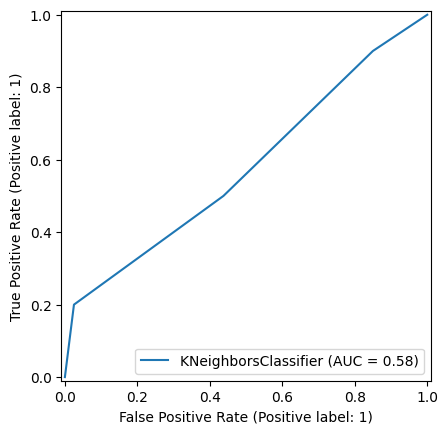

In [160]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

show_results(knn, param_grid)

/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [03:01:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [03:01:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [03:01:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [03:01:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warni

Confusion Matrix:
 [[72  8]
 [ 9 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89        80
           1       0.58      0.55      0.56        20

    accuracy                           0.83       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.83      0.83      0.83       100

Accuracy: 0.83
ROC-AUC: 0.84875


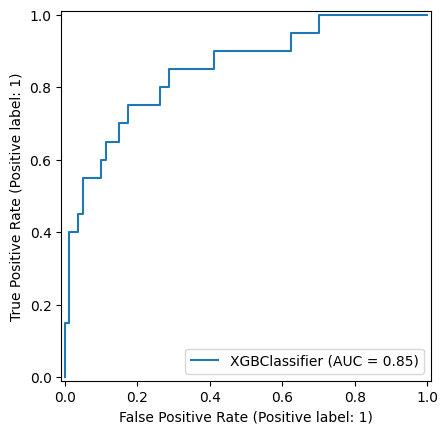

In [161]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

show_results(xgb, param_grid)

In [162]:
from transformers import BertTokenizer, BertModel
import torch

device = "mps" if torch.backends.mps.is_available() else "cpu"

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
model.to(device)

model.eval()

def get_embeddings(text):
    inputs = tokenizer(
        str(text),
        return_tensors="pt",
        truncation=True,
        max_length=512,
        padding="max_length"
    )
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        last_hidden_state = outputs.last_hidden_state  # (1, seq_len, 768)
        attention_mask = inputs["attention_mask"]
        mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()

        # Mean pooling
        sum_embeddings = torch.sum(last_hidden_state * mask_expanded, 1)
        sum_mask = torch.clamp(mask_expanded.sum(1), min=1e-9)
        embedding = sum_embeddings / sum_mask

    return embedding.cpu().numpy().flatten()

In [163]:
bert_X_train = df["Article"].apply(get_embeddings)
bert_X_test = df["Article"].apply(get_embeddings)

In [164]:
X_train_embeddings = np.vstack(bert_X_train.values)
X_test_embeddings = np.vstack(bert_X_test.values)

In [168]:
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X_train_embeddings, y, test_size=0.2, random_state = 42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_test_embeddings = scaler.fit_transform(X_test_embeddings)

In [169]:
def show_results(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_bert, y_train_bert)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_bert)

    cm = confusion_matrix(y_test_bert, y_pred)
    print("Confusion Matrix:\n", cm)

    print("\nClassification Report:\n", classification_report(y_test_bert, y_pred))

    acc = accuracy_score(y_test_bert, y_pred)
    print("Accuracy:", acc)

    if len(set(y)) == 2:
        y_proba = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test_bert, y_proba)
        print("ROC-AUC:", roc_auc)

        RocCurveDisplay.from_estimator(best_model, X_test_bert, y_test_bert)
        plt.show()

Confusion Matrix:
 [[67 13]
 [ 4 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89        80
           1       0.55      0.80      0.65        20

    accuracy                           0.83       100
   macro avg       0.75      0.82      0.77       100
weighted avg       0.87      0.83      0.84       100

Accuracy: 0.83
ROC-AUC: 0.5


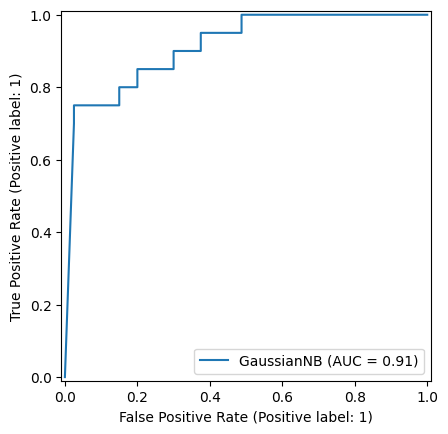

In [170]:
gnb = GaussianNB()

param_grid = {'var_smoothing': [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7]}

show_results(gnb, param_grid)

/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklea

Confusion Matrix:
 [[77  3]
 [ 8 12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        80
           1       0.80      0.60      0.69        20

    accuracy                           0.89       100
   macro avg       0.85      0.78      0.81       100
weighted avg       0.88      0.89      0.88       100

Accuracy: 0.89
ROC-AUC: 0.5


/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklea

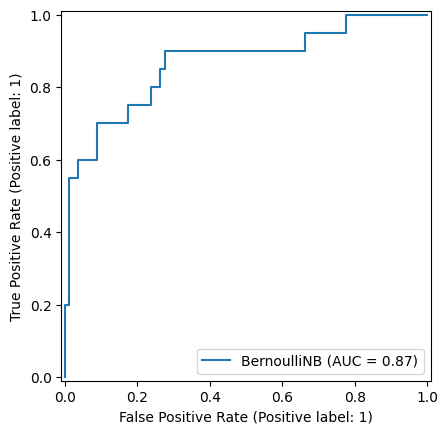

In [171]:
bnb = BernoulliNB()

bnb_param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False]
}

show_results(bnb, bnb_param_grid)

/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklea

Confusion Matrix:
 [[76  4]
 [ 5 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94        80
           1       0.79      0.75      0.77        20

    accuracy                           0.91       100
   macro avg       0.86      0.85      0.86       100
weighted avg       0.91      0.91      0.91       100

Accuracy: 0.91
ROC-AUC: 0.8925


/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pritamdas/Library/Py

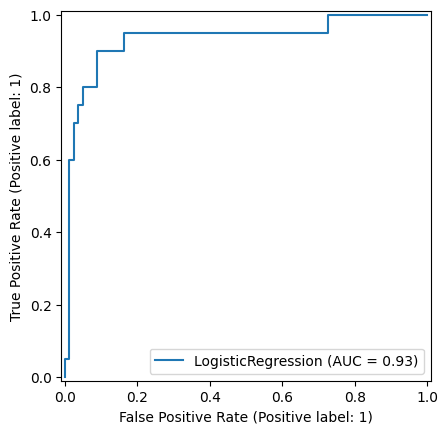

In [172]:
lr = LogisticRegression(max_iter= 1000,random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga'] 
}

show_results(lr, param_grid)

Confusion Matrix:
 [[79  1]
 [11  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93        80
           1       0.90      0.45      0.60        20

    accuracy                           0.88       100
   macro avg       0.89      0.72      0.76       100
weighted avg       0.88      0.88      0.86       100

Accuracy: 0.88
ROC-AUC: 0.726875


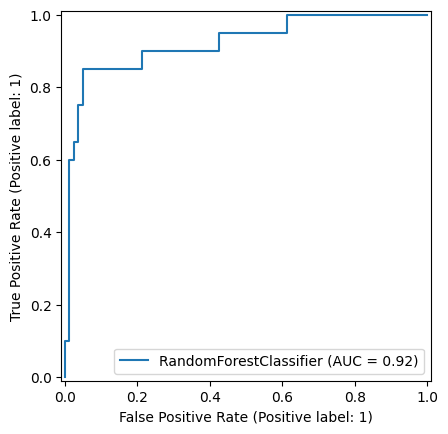

In [173]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

show_results(rf, param_grid)

Confusion Matrix:
 [[78  2]
 [11  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        80
           1       0.82      0.45      0.58        20

    accuracy                           0.87       100
   macro avg       0.85      0.71      0.75       100
weighted avg       0.86      0.87      0.85       100

Accuracy: 0.87
ROC-AUC: 0.8474999999999999


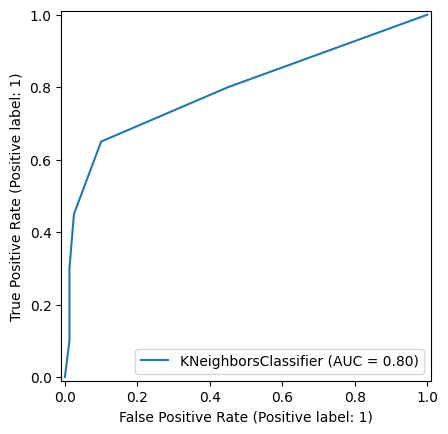

In [174]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

show_results(knn, param_grid)

/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [03:36:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [03:36:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [03:36:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/pritamdas/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [03:36:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warni

Confusion Matrix:
 [[79  1]
 [ 8 12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95        80
           1       0.92      0.60      0.73        20

    accuracy                           0.91       100
   macro avg       0.92      0.79      0.84       100
weighted avg       0.91      0.91      0.90       100

Accuracy: 0.91
ROC-AUC: 0.875


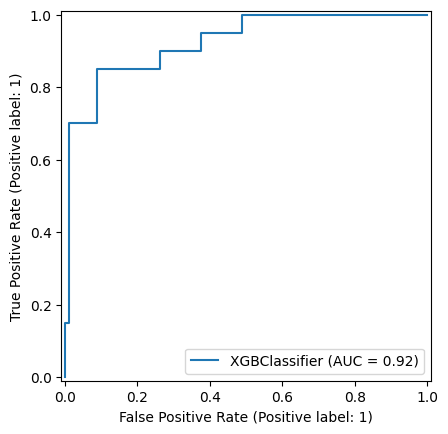

In [175]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

show_results(xgb, param_grid)